In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import sys
sys.path.append('../src')

import matplotlib.pyplot as plt
import scanpy as sc
import seaborn as sns
import numpy as np

from spaceoracle.tools.data import load_example_slideseq, filter_adata
from spaceoracle.tools.network import GeneRegulatoryNetwork

In [5]:
slideseq_data = load_example_slideseq('../data/slideseq/')
slideseq_data

[('../data/slideseq/mLND5_1.h5ad',
  AnnData object with n_obs × n_vars = 50058 × 19041
      obs: 'cluster'
      obsm: 'X_spatial', 'spatial'),
 ('../data/slideseq/mLND5_2.h5ad',
  AnnData object with n_obs × n_vars = 41361 × 18972
      obs: 'cluster'
      obsm: 'X_spatial', 'spatial'),
 ('../data/slideseq/mLND3_2.h5ad',
  AnnData object with n_obs × n_vars = 30242 × 25343
      obs: 'cluster'
      obsm: 'X_spatial', 'spatial'),
 ('../data/slideseq/mLND3_1.h5ad',
  AnnData object with n_obs × n_vars = 39721 × 24649
      obs: 'cluster'
      uns: 'cluster_colors'
      obsm: 'X_spatial', 'spatial')]

In [6]:
adata = slideseq_data[3][1].copy()
adata = filter_adata(adata, min_counts=500)

In [7]:
grn = GeneRegulatoryNetwork()
target_gene = 'Cd74'

regulators = grn.get_regulators(adata, target_gene=target_gene)
regulators, len(regulators)

(['Atf3',
  'Bcl11a',
  'Ebf1',
  'Ebf3',
  'Egr2',
  'Gata1',
  'Gata2',
  'Mef2a',
  'Mef2c',
  'Pax5',
  'Pou2f2',
  'Prdm9',
  'Snai3',
  'Stat2',
  'Taf1',
  'Tal1'],
 16)

In [8]:
X = adata.to_df()[regulators]
X

,Atf3,Bcl11a,Ebf1,Ebf3,Egr2,Gata1,Gata2,Mef2a,Mef2c,Pax5,Pou2f2,Prdm9,Snai3,Stat2,Taf1,Tal1
AAAAATCGCGTCCA,0.0,0.0,0.643342,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
AAAACCTCACATTT,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.458739,0.0,0.0,0.000000,0.000000,0.0
AAAACGTGATCCTA,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.691110,0.000000,0.0
AAAACTATTTAAGG,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
AAAAGATGCTCAGC,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,1.512969,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTTTTCGACAGAG,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.646273,0.0
TTTTTTCGCGGCTA,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
TTTTTTGGGCTGGT,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.423997,0.0,0.0,0.423997,0.000000,0.0
TTTTTTGTACGATT,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.857282,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0


In [9]:
y = adata.to_df()[[target_gene]]
y

,Cd74
AAAAATCGCGTCCA,0.000000
AAAACCTCACATTT,0.772030
AAAACGTGATCCTA,1.095895
AAAACTATTTAAGG,0.000000
AAAAGATGCTCAGC,1.744014
...,...
TTTTTTCGACAGAG,0.000000
TTTTTTCGCGGCTA,0.000000
TTTTTTGGGCTGGT,0.000000
TTTTTTGTACGATT,1.860506


In [10]:
xy = adata.obsm['spatial']
xy

ArrayView([[-2583.5,  2490.7],
           [-3975.2,  2855.4],
           [-1578.6,  2046. ],
           ...,
           [-3547.4,  2483.1],
           [-2052.1,  2937.7],
           [-2025.5,  2342.3]])

In [11]:
cluster_labels = adata.obs['cluster']
cluster_labels = np.array(cluster_labels)

In [12]:
from spaceoracle.models.transformer import TransformerEstimator
estimator = TransformerEstimator()

Using device: cuda


In [13]:
estimator.fit(
    X.values[:9000, :], y.values[:9000], xy[:9000, :], 
    cluster_labels[:9000], 
    init_betas='ols', 
    max_epochs=200, 
    learning_rate=3e-3,
    context_length=100,
    mode = 'train_test'
    )

MSE: 2.4449: 100%|██████████| 200/200 [14:29<00:00,  4.35s/it]


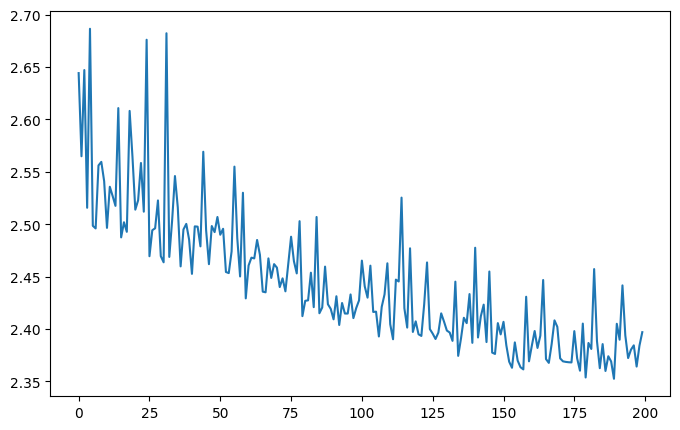

In [14]:
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams['figure.dpi'] = 100
plt.plot(estimator.losses)
plt.show()

In [15]:
betas, y_pred = estimator.get_betas(X.values[9000:, :], xy[9000:, :], cluster_labels[9000:])

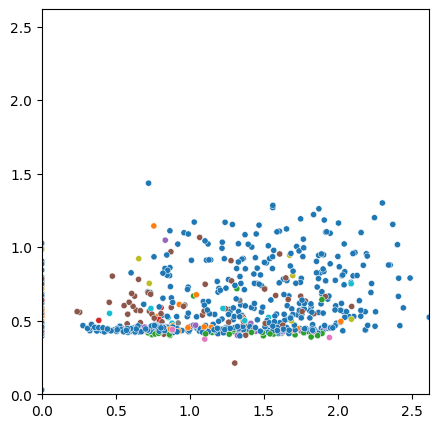

In [16]:
plt.rcParams["figure.figsize"] = (5, 5)
plt.rcParams['figure.dpi'] = 100
sns.scatterplot(x=y.values[9000:, :].reshape(-1), y=y_pred.reshape(-1), s=20, c=adata.obs.cluster.values[9000:], cmap='tab10')
plt.xlim(y.values[9000:, :].min(), y.values[9000:, :].max())
plt.ylim(y.values[9000:, :].min(), y.values[9000:, :].max())
plt.show()